In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as cst
from scipy.integrate import ode
%matplotlib notebook

In [15]:
class Metric:
    def __init__(self,M):
        self.M = M
        self.Rs = 2*cst.G*M/(cst.c**2)

Cette classe générique sert de base pour définir des métriques.

In [16]:
class LightCone:
    def __init__(self,r,metric,steps,time,normalized=True):
        step = time/steps
        self.r=r
        self.metric = metric
        (self.times,self.radius) = metric.cones(r,step,steps,normalized)

Cette classe utilise des instances de la classe "metric" pour dessiner des cônes de lumière.

In [17]:
class Freefall:
    def __init__(self,r0,metric,steps,time,proper=False,normalized=True):
        self.r0 = r0
        self.metric = metric
        (self.times,self.radius) = metric.fall(r0,steps,time,normalized)

Cette classe utilise des instances de la classe "metric" pour dessiner des trajectoires d'objets en chute libre.

In [18]:
class Schwarzschild(Metric):
    def __init__(self,M):
        super().__init__(M)
    def cones(self,r,step,n,normalized):
        if not normalized:
            step/=self.Rs
            r/=self.Rs
        radius = [r]
        times = [0]
        integrator = ode(self.cone_p)
        integrator.set_initial_value(r,0)
        for k in range(n):            
            radius.append(integrator.integrate(integrator.t+step))
            times.append(integrator.t)
        integrator = ode(self.cone_n)
        integrator.set_initial_value(r,0)
        if r<1 :
            step = -step
        for k in range(n):            
            radius.insert(0,integrator.integrate(integrator.t+step))
            times.insert(0,integrator.t)
        (times,radius)=(np.array(times),np.array(radius))
        if not normalized:
            times = times*self.Rs
            radius = radius*self.Rs
        return (times,radius)
    def cone_p(self,t,r):
        return (1-1/r)
    def cone_n(self,t,r):
        return -(1-1/r)
    def fall(self,r0,steps,time,normalized):
        step = time / steps
        if not normalized:
            step/=self.Rs
            r0/=self.Rs
        self.r0 = r0
        radius = [r0]
        times = [0]
        integrator = ode(self.fall_eq)
        integrator.set_initial_value(r0-r0*np.finfo(float).epsneg,0)
        for k in range(steps):            
            radius.append(integrator.integrate(integrator.t+step))
            times.append(integrator.t)
        (times,radius)=(np.array(times),np.array(radius))
        if not normalized:
            times = times*self.Rs
            radius = radius*self.Rs
        return (times,radius)
    def fall_eq(self,t,r):
        return -np.sqrt((1/r-1/self.r0)*((1-1/r)**2)/(1-1/self.r0))

Cette classe permet de tracer des courbes dans la métrique de Schwarzschild.

<IPython.core.display.Javascript object>


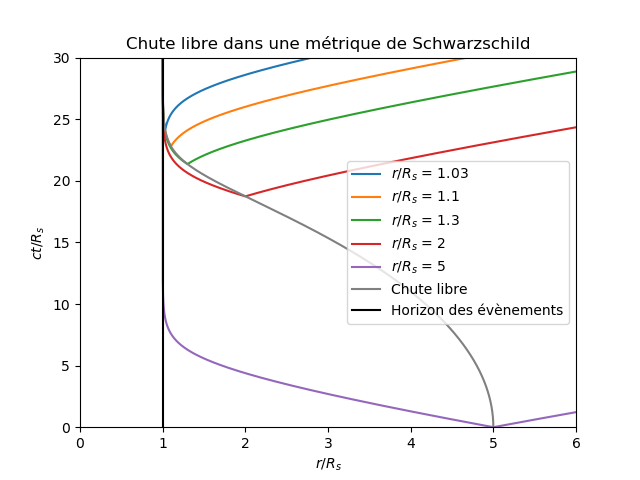

In [19]:
plt.figure(1)

M = 1

time = 30
steps = 30000
cones = 11

metric = Schwarzschild(M)
test_fall = Freefall(5,metric,steps,time)

steps = len(test_fall.radius)

r_cones = [1.03,1.1,1.3,2,5]
i = steps-1
points=[]

for k in r_cones:
    while k > test_fall.radius[i]:
        i-=1
    points.append(i)

light_cones = [LightCone(test_fall.radius[i],metric,steps,time) for i in points]
    

for k in range(len(light_cones)):
    cone = light_cones[k]
    shift = test_fall.times[points[k]]
    label = "$r/R_s$ = " + str(r_cones[k])
    plt.plot(cone.radius,cone.times+shift,label=label)

plt.plot(test_fall.radius,test_fall.times, color = "grey", label="Chute libre")
    
plt.ylim(bottom=0,top=time)
plt.xlim(left=0,right=6)
plt.axvline(x=1, color="black", label = "Horizon des évènements")
plt.title("Chute libre dans une métrique de Schwarzschild")
plt.xlabel("$r/R_s$")
plt.ylabel("$ct/R_s$")
plt.legend()
plt.show()

In [20]:
class Schwarzschild_properTime(Metric):
    def __init__(self,M):
        super().__init__(M)
    def cones(self,r,step,n,normalized):
        if not normalized:
            step/=self.Rs
            r/=self.Rs
        radius = [r]
        times = [0]
        integrator = ode(self.cone_p)
        integrator.set_initial_value(r,0)
        for k in range(n):            
            radius.append(integrator.integrate(integrator.t+step))
            times.append(integrator.t)
        integrator = ode(self.cone_n)
        integrator.set_initial_value(r,0)
        for k in range(n):            
            radius.insert(0,integrator.integrate(integrator.t+step))
            times.insert(0,integrator.t)
        (times,radius)=(np.array(times),np.array(radius))
        if not normalized:
            times = times*self.Rs
            radius = radius*self.Rs
        return (times,radius)
    def cone_p(self,t,r):
        return (1-1/r)*np.sqrt(1-1/self.r0)/(1-1/r)
    def cone_n(self,t,r):
        return -(1-1/r)*np.sqrt(1-1/self.r0)/(1-1/r)
    def fall(self,r0,steps,time,normalized):
        step = time / steps
        if not normalized:
            step/=self.Rs
            r0/=self.Rs
        self.r0 = r0
        radius = [r0]
        times = [0]
        integrator = ode(self.fall_eq)
        integrator.set_initial_value(r0-r0*np.finfo(float).epsneg,0)
        for k in range(steps):            
            radius.append(integrator.integrate(integrator.t+step))
            times.append(integrator.t)
            if radius[-1] <= 0:
                radius[-1]=0
                break
        (times,radius)=(np.array(times),np.array(radius))
        if not normalized:
            times = times*self.Rs
            radius = radius*self.Rs
        return (times,radius)
    def fall_eq(self,t,r):
        return -np.sqrt((1/r-1/self.r0))

Cette classe permet de tracer des courbes dans la métrique de Schwarzschild, avec la trajectoire d'une chute libre exprimée en temps propre.

<IPython.core.display.Javascript object>


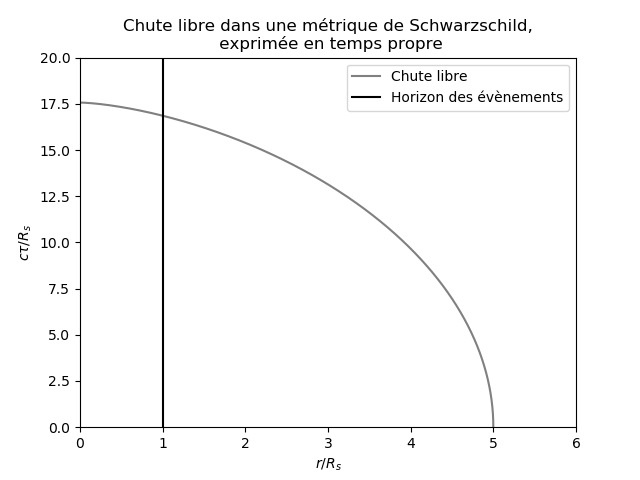

C:\Program Files\Anaconda\Lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in sqrt
C:\Program Files\Anaconda\Lib\site-packages\scipy\integrate\_ode.py:1009: UserWarning: vode: Repeated convergence failures. (Perhaps bad Jacobian supplied or wrong choice of MF or tolerances.)
  self.messages.get(istate, unexpected_istate_msg)))


In [21]:
plt.figure(2)

M = 1

time = 20
steps = 20000
cones = 11

metric = Schwarzschild_properTime(M)
test_fall = Freefall(5,metric,steps,time)

plt.plot(test_fall.radius,test_fall.times, color = "grey", label="Chute libre")


plt.ylim(bottom=0,top=time)
plt.xlim(left=0,right=6)
plt.axvline(x=1, color="black", label = "Horizon des évènements")
plt.title("Chute libre dans une métrique de Schwarzschild,\n exprimée en temps propre")
plt.xlabel("$r/R_s$")
plt.ylabel("$c\\tau/R_s$")
plt.legend()
plt.show()

In [10]:
class EddingtonFinkelstein(Metric):
    def __init__(self,M):
        super().__init__(M)
    def cones(self,r,step,n,normalized):
        if not normalized:
            step/=self.Rs
            r/=self.Rs
        radius = [r]
        times = [0]
        integrator = ode(self.cone_p)
        integrator.set_initial_value(r,0)
        for k in range(n):            
            radius.append(integrator.integrate(integrator.t+step))
            times.append(integrator.t)
            if radius[-1] <=0:
                radius[-1]=0
                break
        integrator = ode(self.cone_n)
        integrator.set_initial_value(r,0)
        for k in range(n):            
            radius.insert(0,integrator.integrate(integrator.t+step))
            times.insert(0,integrator.t)
            if radius[0] <=0:
                radius[0]=0
                break
        (times,radius)=(np.array(times),np.array(radius))
        if not normalized:
            times = times*self.Rs
            radius = radius*self.Rs
        return (times,radius)
    def cone_p(self,t,r):
        return ((r-1)/(r+1))
    def cone_n(self,t,r):
        return -1
    def fall(self,r0,steps,time,normalized):
        step = time / steps
        if not normalized:
            step/=self.Rs
            r0/=self.Rs
        self.r0 = r0
        radius = [r0]
        times = [0]
        integrator = ode(self.fall_eq)
        integrator.set_initial_value(r0-r0*np.finfo(float).epsneg,0)
        for k in range(steps):            
            radius.append(integrator.integrate(integrator.t+step))
            times.append(integrator.t)
            if radius[-1] <= 0.00001:
                radius[-1]=0
                break
        (times,radius)=(np.array(times),np.array(radius))
        if not normalized:
            times = times*self.Rs
            radius = radius*self.Rs
        return (times,radius)
    def fall_eq(self,t,r):
        return -np.sqrt((1/r-1/self.r0))*(r-1)/(r*np.sqrt(1-1/self.r0)-np.sqrt(1/r-1/self.r0))

Cette classe permet de tracer des courbes dans la métrique d'Eddington-Finkelstein.

<IPython.core.display.Javascript object>


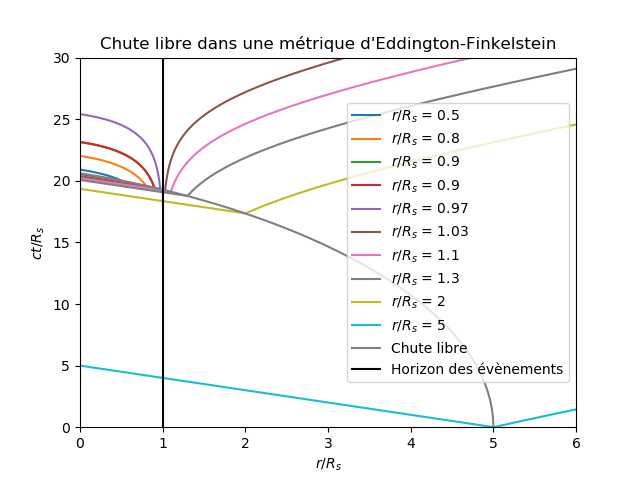

C:\Program Files\Anaconda\Lib\site-packages\ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in sqrt
C:\Program Files\Anaconda\Lib\site-packages\scipy\integrate\_ode.py:1009: UserWarning: vode: Excess work done on this call. (Perhaps wrong MF.)
  self.messages.get(istate, unexpected_istate_msg)))


In [22]:
plt.figure(3)

M = 1

time = 30
steps = 30000
cones = 11

metric = EddingtonFinkelstein(M)
test_fall = Freefall(5,metric,steps,time)

steps = len(test_fall.radius)

r_cones = [0.5,0.8,0.9,0.9,0.97,1.03,1.1,1.3,2,5]
i = steps-1
points=[]

for k in r_cones:
    while k > test_fall.radius[i]:
        i-=1
    points.append(i)

light_cones = [LightCone(test_fall.radius[i],metric,steps,time) for i in points]
    

for k in range(len(light_cones)):
    cone = light_cones[k]
    shift = test_fall.times[points[k]]
    label = "$r/R_s$ = " + str(r_cones[k])
    plt.plot(cone.radius,cone.times+shift,label=label)

plt.plot(test_fall.radius,test_fall.times, color = "grey", label="Chute libre")

plt.ylim(bottom=0,top=time)
plt.xlim(left=0,right=6)
plt.axvline(x=1, color="black", label = "Horizon des évènements")
plt.title("Chute libre dans une métrique d'Eddington-Finkelstein")
plt.xlabel("$r/R_s$")
plt.ylabel("$ct/R_s$")
plt.legend()
plt.show()

In [12]:
class Kruskal(Metric):
    def __init__(self,M):
        super().__init__(M)
    def cones(self,r,step,n,normalized):
        if not normalized:
            step/=self.Rs
            r/=self.Rs
        radius = [r]
        times = [0]
        integrator = ode(self.cone_p)
        integrator.set_initial_value(r,0)
        for k in range(n):            
            radius.append(integrator.integrate(integrator.t+step))
            times.append(integrator.t)
            if radius[-1] <=0:
                radius[-1]=0
                break
        integrator = ode(self.cone_n)
        integrator.set_initial_value(r,0)
        for k in range(n):            
            radius.insert(0,integrator.integrate(integrator.t+step))
            times.insert(0,integrator.t)
            if radius[0] <=0:
                radius[0]=0
                break
        (times,radius)=(np.array(times),np.array(radius))
        if not normalized:
            times = times*self.Rs
            radius = radius*self.Rs
        return (times,radius)
    def cone_p(self,v,u):
        return 1
    def cone_n(self,v,u):
        return -1
    def fall(self,r0,steps,time,normalized):
        step = time / steps
        if not normalized:
            step/=self.Rs
            r0/=self.Rs
        self.r0 = r0
        radius = [r0]
        t0 = np.log(r0-1)
        times = [t0]
        integrator = ode(self.fall_eq)
        integrator.set_initial_value(r0-r0*np.finfo(float).epsneg,t0)
        for k in range(steps):            
            radius.append(integrator.integrate(integrator.t+step))
            times.append(integrator.t)
            if radius[-1] <= 0.00001:
                radius[-1]=0
                break
        us = []
        vs = []
        for k in range(len(times)):
            us.append((np.exp((times[k]+radius[k])/2)+(radius[k]-1)*np.exp((-times[k]+radius[k])/2))/2)
            vs.append((np.exp((times[k]+radius[k])/2)-(radius[k]-1)*np.exp((-times[k]+radius[k])/2))/2)
        (us,vs)=(np.array(us),np.array(vs))
        if not normalized:
            vs = vs*self.Rs
            us = us*self.Rs
        return (vs,us)
    def fall_eq(self,t,r):
        return -np.sqrt((1/r-1/self.r0))*(r-1)/(r*np.sqrt(1-1/self.r0)-np.sqrt(1/r-1/self.r0))
    def fall_eq_s(self,t,r):
        return -np.sqrt((1/r-1/self.r0)*((1-1/r)**2)/(1-1/self.r0))

Cette classe permet de tracer des courbes dans la métrique de Kruskal.

<IPython.core.display.Javascript object>


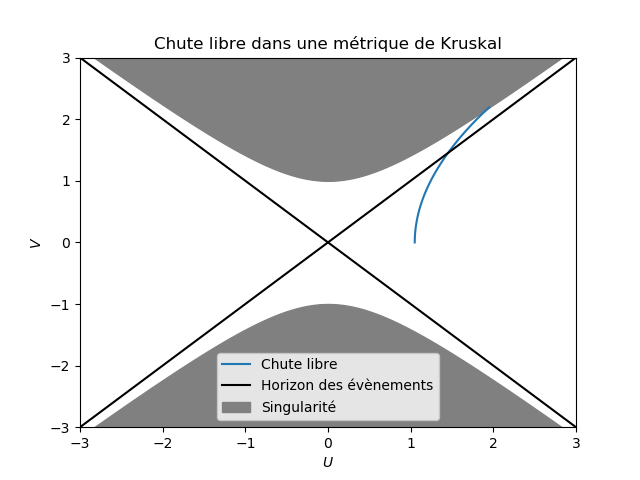

C:\Program Files\Anaconda\Lib\site-packages\ipykernel_launcher.py:63: RuntimeWarning: invalid value encountered in sqrt
C:\Program Files\Anaconda\Lib\site-packages\scipy\integrate\_ode.py:1009: UserWarning: vode: Excess work done on this call. (Perhaps wrong MF.)
  self.messages.get(istate, unexpected_istate_msg)))


In [23]:
plt.figure(4)

M = 1
lim = 3

time = 30
steps = 30000

metric = Kruskal(M)
test_fall = Freefall(1.3,metric,steps,time)

plt.plot(test_fall.radius,test_fall.times, label="Chute libre")

plt.ylim(bottom=-lim,top=lim)
plt.xlim(left=-lim,right=lim)

#singularity
x = np.linspace(-lim,lim,10000)
plt.fill_between(x,np.sqrt(x**2+1),y2=lim+0.1,color='grey',label='Singularité')
plt.fill_between(x,-lim-0.1,y2=-np.sqrt(x**2+1),color='grey')

#event horizon
x = np.linspace(-lim,lim,10000)
plt.plot(x,x,color='black',label = "Horizon des évènements")
plt.plot(x,-x,color='black')

plt.title("Chute libre dans une métrique de Kruskal")
plt.xlabel("$U$")
plt.ylabel("$V$")
plt.legend()
plt.show()